In [7]:
!pip install matplotlib
# Task 3: Correlation between News and Stock Movement
# Simple Jupyter Notebook Implementation - No TextBlob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create sample data
dates = pd.date_range('2024-01-01', periods=30, freq='D')

# Sample stock data
np.random.seed(42)
prices = [100]
for i in range(29):
    change = np.random.normal(0, 0.015)
    prices.append(prices[-1] * (1 + change))

stock_data = pd.DataFrame({
    'date': dates,
    'close': prices
})

# Sample news data with pre-defined sentiment scores
news_data = []
for date in dates:
    num_articles = np.random.randint(1, 4)
    for _ in range(num_articles):
        # Create headlines with manual sentiment scores
        headlines = [
            ("Company reports strong earnings", 0.8),
            ("Stock reaches new high", 0.9),
            ("Positive market outlook", 0.7),
            ("Revenue exceeds expectations", 0.6),
            ("Poor quarterly results", -0.7),
            ("Market downturn continues", -0.8),
            ("Economic concerns rise", -0.6),
            ("Sales decline reported", -0.5),
            ("Stable performance maintained", 0.1),
            ("No major changes expected", 0.0)
        ]
        headline, sentiment = headlines[np.random.randint(0, len(headlines))]
        news_data.append({
            'date': date,
            'headline': headline,
            'sentiment': sentiment
        })

news_df = pd.DataFrame(news_data)

print("Stock Data:")
print(stock_data.head())
print("\nNews Data:")
print(news_df.head())

  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Stock Data:
        date       close
0 2024-01-01  100.000000
1 2024-01-02  100.745071
2 2024-01-03  100.536130
3 2024-01-04  101.512871
4 2024-01-05  103.831978

News Data:
        date                         headline  sentiment
0 2024-01-01           Economic concerns rise       -0.6
1 2024-01-01           Sales decline reported       -0.5
2 2024-01-01          Positive market outlook        0.7
3 2024-01-02  Company reports strong earnings        0.8
4 2024-01-02     Revenue exceeds expectations        0.6


In [8]:
# Step 1: Date Alignment
stock_data['date'] = pd.to_datetime(stock_data['date']).dt.date
news_df['date'] = pd.to_datetime(news_df['date']).dt.date

print("Dates aligned successfully!")
print(f"Stock data dates: {stock_data['date'].min()} to {stock_data['date'].max()}")
print(f"News data dates: {news_df['date'].min()} to {news_df['date'].max()}")

Dates aligned successfully!
Stock data dates: 2024-01-01 to 2024-01-30
News data dates: 2024-01-01 to 2024-01-30


In [9]:
# Step 2: Sentiment Analysis (already done with manual scores)
print("Sentiment Analysis Completed!")
print(news_df[['headline', 'sentiment']].head(10))

Sentiment Analysis Completed!
                          headline  sentiment
0           Economic concerns rise       -0.6
1           Sales decline reported       -0.5
2          Positive market outlook        0.7
3  Company reports strong earnings        0.8
4     Revenue exceeds expectations        0.6
5           Sales decline reported       -0.5
6     Revenue exceeds expectations        0.6
7        Market downturn continues       -0.8
8        Market downturn continues       -0.8
9     Revenue exceeds expectations        0.6


In [10]:
# Step 3: Calculate Stock Returns
stock_data = stock_data.sort_values('date')
stock_data['daily_return'] = stock_data['close'].pct_change() * 100

print("Stock Returns Calculated!")
print(stock_data[['date', 'close', 'daily_return']].head())

Stock Returns Calculated!
         date       close  daily_return
0  2024-01-01  100.000000           NaN
1  2024-01-02  100.745071      0.745071
2  2024-01-03  100.536130     -0.207396
3  2024-01-04  101.512871      0.971533
4  2024-01-05  103.831978      2.284545


In [11]:
# Step 4: Aggregate Daily Sentiment
daily_sentiment = news_df.groupby('date').agg({
    'sentiment': 'mean',
    'headline': 'count'
}).rename(columns={'headline': 'article_count'}).reset_index()

print("Daily Sentiment Aggregated!")
print(daily_sentiment.head())

Daily Sentiment Aggregated!
         date  sentiment  article_count
0  2024-01-01  -0.133333              3
1  2024-01-02   0.700000              2
2  2024-01-03   0.050000              2
3  2024-01-04  -0.800000              2
4  2024-01-05  -0.100000              2


In [12]:
# Step 5: Merge Data and Calculate Correlation
merged_data = pd.merge(stock_data, daily_sentiment, on='date', how='inner')
merged_data = merged_data.dropna()

correlation = merged_data['sentiment'].corr(merged_data['daily_return'])

print("="*50)
print("CORRELATION RESULTS")
print("="*50)
print(f"Pearson Correlation: {correlation:.4f}")

if abs(correlation) > 0.5:
    strength = "Strong"
elif abs(correlation) > 0.3:
    strength = "Moderate"
elif abs(correlation) > 0.1:
    strength = "Weak"
else:
    strength = "Very Weak"

print(f"Correlation Strength: {strength}")

CORRELATION RESULTS
Pearson Correlation: 0.1191
Correlation Strength: Weak


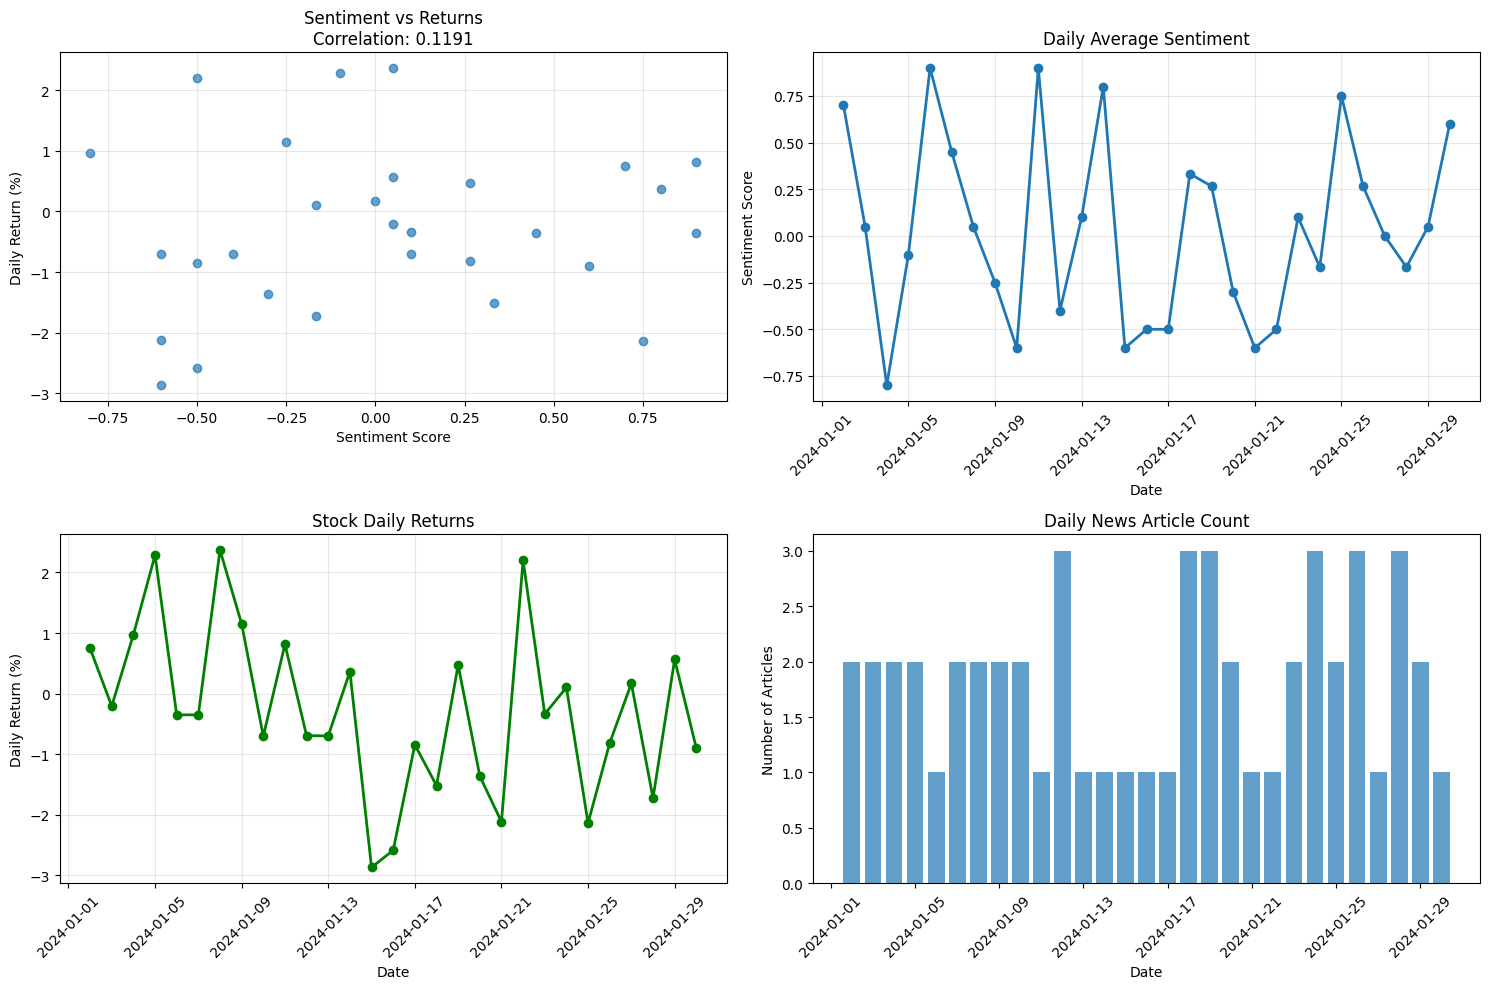

In [13]:
# Step 6: Visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Sentiment vs Returns
ax1.scatter(merged_data['sentiment'], merged_data['daily_return'], alpha=0.7)
ax1.set_xlabel('Sentiment Score')
ax1.set_ylabel('Daily Return (%)')
ax1.set_title(f'Sentiment vs Returns\nCorrelation: {correlation:.4f}')
ax1.grid(True, alpha=0.3)

# Plot 2: Sentiment over time
ax2.plot(merged_data['date'], merged_data['sentiment'], marker='o', linewidth=2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Sentiment Score')
ax2.set_title('Daily Average Sentiment')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Plot 3: Returns over time
ax3.plot(merged_data['date'], merged_data['daily_return'], marker='o', color='green', linewidth=2)
ax3.set_xlabel('Date')
ax3.set_ylabel('Daily Return (%)')
ax3.set_title('Stock Daily Returns')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

# Plot 4: Article count
ax4.bar(merged_data['date'], merged_data['article_count'], alpha=0.7)
ax4.set_xlabel('Date')
ax4.set_ylabel('Number of Articles')
ax4.set_title('Daily News Article Count')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [14]:
# Step 7: Summary Statistics
print("="*60)
print("SUMMARY STATISTICS")
print("="*60)

print(f"\n1. DATA OVERVIEW:")
print(f"   - Analysis Period: {len(merged_data)} days")
print(f"   - Total Articles: {len(news_df)}")
print(f"   - Avg Articles per Day: {merged_data['article_count'].mean():.1f}")

print(f"\n2. SENTIMENT ANALYSIS:")
print(f"   - Average Sentiment: {merged_data['sentiment'].mean():.3f}")
print(f"   - Sentiment Std Dev: {merged_data['sentiment'].std():.3f}")
print(f"   - Most Positive: {merged_data['sentiment'].max():.3f}")
print(f"   - Most Negative: {merged_data['sentiment'].min():.3f}")

print(f"\n3. STOCK PERFORMANCE:")
print(f"   - Average Daily Return: {merged_data['daily_return'].mean():.3f}%")
print(f"   - Return Std Dev: {merged_data['daily_return'].std():.3f}%")

print(f"\n4. CORRELATION INTERPRETATION:")
if correlation > 0:
    print(f"   - Positive correlation: Good news tends to correlate with positive returns")
else:
    print(f"   - Negative correlation: Good news tends to correlate with negative returns")

SUMMARY STATISTICS

1. DATA OVERVIEW:
   - Analysis Period: 29 days
   - Total Articles: 56
   - Avg Articles per Day: 1.8

2. SENTIMENT ANALYSIS:
   - Average Sentiment: 0.029
   - Sentiment Std Dev: 0.499
   - Most Positive: 0.900
   - Most Negative: -0.800

3. STOCK PERFORMANCE:
   - Average Daily Return: -0.277%
   - Return Std Dev: 1.374%

4. CORRELATION INTERPRETATION:
   - Positive correlation: Good news tends to correlate with positive returns
